In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [115]:
#movies = pd.read_csv('C:/Users/asger/Documents/GitHub/ML-For-Beginners/5-Clustering/data/imdb_top250_movies.csv')
movies = pd.read_csv('C:/Users/asger/Documents/GitHub/ML-For-Beginners/5-Clustering/data/imdb_top250_movies.csv', sep = ',', decimal = ',', skiprows=[1])
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,1,2,The Godfather,1972,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",tt0068646,movie,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com
1,2,3,The Godfather: Part II,1974,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",tt0071562,movie,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/
2,3,4,The Dark Knight,2008,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/
3,4,5,12 Angry Men,1957,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",tt0050083,movie,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men
4,5,6,Schindler's List,1993,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally (book), Steven Zaillian (scree...","Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",...,Won 7 Oscars. Another 71 wins & 33 nominations.,93.0,8.9,"937,837",tt0108052,movie,09 Mar 2004,NaN,Universal Pictures,http://www.schindlerslist.com


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_movies = movies.loc[:, ('imdbVotes','Year', 'Metascore', 'imdbRating' )]

new_movies.dropna(inplace=True)

y = new_movies['imdbVotes']

new_movies['imdbVotes'] = le.fit_transform(new_movies['imdbVotes'])

y = le.transform(y)

In [127]:
from sklearn.cluster import KMeans

nclusters = 2
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(new_movies)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(new_movies)
y_cluster_kmeans

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Now we use this to test the sillouette score.

In [128]:
from sklearn import metrics
score = metrics.silhouette_score(new_movies, y_cluster_kmeans)
score

0.5084459637795227

Optimally the sillouette score should be 1, but it goes from -1 to 1. even though the score is not one or really that close we can still build the model as long as the score is above 0.

So we build the model.

In [129]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_movies)
    wcss.append(kmeans.inertia_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


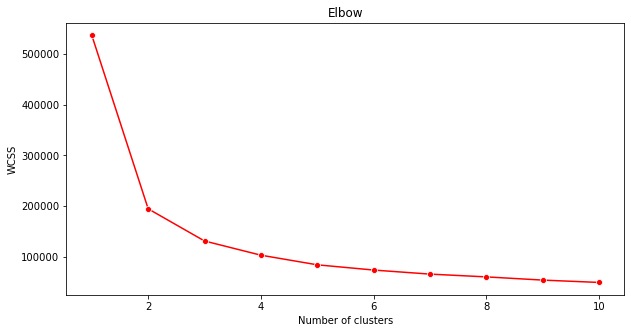

In [130]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method in this case shows us that the optimal number of clusters is around to. (note that before doing the elbow method, while doing the assignment, the cluster number was 3, but it was changed after this obsvervation.)

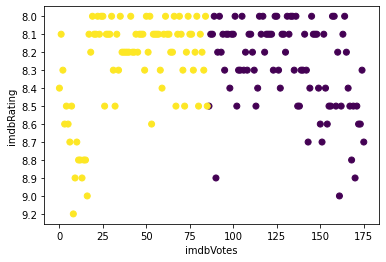

In [136]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(new_movies)
labels = kmeans.predict(new_movies)
plt.scatter(new_movies['imdbVotes'],new_movies['imdbRating'],c = labels)
plt.xlabel('imdbVotes')
plt.ylabel('imdbRating')
plt.show()

In [137]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 176 samples were correctly labeled.
Accuracy score: 0.01


As you can see, the mdeol accuracy is horrendous. i am unable to figure out exactly what is wrong and have tried for at long time now. i have a hard time believing that it is something wrong with the data as there is no way there is this much of an unequal variance.